In [1]:
#importing libs
import pandas as pd               #data manupilation
import os                         #directory operation
import numpy as np                #for mathematical operation
import matplotlib.pyplot as plt   #for plotting
import seaborn as sns             #######
import plotly.express as px       #######
import squarify#pip install squarify
from itertools import combinations #count 
from collections import Counter    #count

In [2]:
#read updated data frames
df=pd.read_csv("Sales_Data/prepared_df.csv")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order_Month,Order_day,Address,City,Zip_Code,Product_cat,Quantity_cat
0,248151.0,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,September,Tuesday,380 North St,Los Angeles,CA 90001,cheap,market
1,248152.0,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,September,Sunday,511 8th St,Austin,TX 73301,cheap,normal
2,248153.0,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,September,Monday,151 Johnson St,Los Angeles,CA 90001,cheap,normal
3,248154.0,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,September,Friday,355 Hickory St,Seattle,WA 98101,expensive,normal
4,248155.0,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,September,Sunday,125 5th St,Atlanta,GA 30301,cheap,normal
5,248156.0,34in Ultrawide Monitor,1.0,379.99,2019-09-13 14:59:00,September,Friday,469 12th St,Los Angeles,CA 90001,fancy,normal
6,248157.0,Lightning Charging Cable,1.0,14.95,2019-09-07 09:59:00,September,Saturday,773 Johnson St,Portland,ME 04101,affordable,normal
7,248158.0,Lightning Charging Cable,1.0,14.95,2019-09-02 14:16:00,September,Monday,682 Sunset St,Los Angeles,CA 90001,affordable,normal
8,248159.0,Vareebadd Phone,1.0,400.00,2019-09-06 16:45:00,September,Friday,664 Wilson St,New York City,NY 10001,fancy,normal
9,248160.0,Wired Headphones,1.0,11.99,2019-09-01 22:03:00,September,Sunday,446 9th St,San Francisco,CA 94016,affordable,normal


<h1>Question and Answers</h1>

<p><code>Question 1:</code>what is the best month for sales?How much was earned that month</p>

In [3]:
#total price column
df["Total Price"]=df["Price Each"]*df["Quantity Ordered"]

In [4]:
#create monthly group
monthly_grp=df.groupby("Order_Month")["Total Price"].sum()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_grp = monthly_grp.reindex(new_order, axis=0)
monthly_grp

Order_Month
January      1820569.59
February     2198133.74
March        2802846.32
April        3387765.72
May          3148625.71
June         2574758.04
July         2645146.88
August       2237698.86
September    2091371.25
October      3732828.84
November     3196146.90
December     4603148.06
Name: Total Price, dtype: float64

In [5]:
#function to add labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'yellow', alpha =.8))
#function to plot barplot
def bar(grp:pd.DataFrame):
  fig,ax=plt.subplots(figsize=(15,6))
  grp.plot(kind="bar",ax=ax)
  ax.set_ylabel("Sales in USD($)")
  addlabels(grp.index,grp.values)
  plt.show()

C:\Users\alexe\AppData\Local\Temp/ipykernel_18140/120718051.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


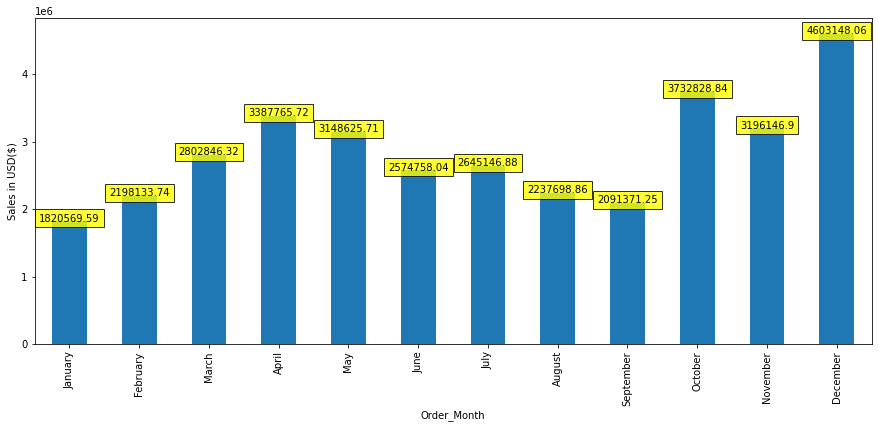

In [6]:
bar(monthly_grp)

<p><code>Answer:</code>December is the month with the highest money earned</p>
<hr>

<p><code>Question 2</code>What city has the highest number of sales</p>

In [7]:
#unique cities with the amount of orders
df["City"].value_counts()

 San Francisco    44592
 Los Angeles      29523
 New York City    24818
 Boston           19868
 Atlanta          14845
 Dallas           14774
 Seattle          14694
 Portland         12433
 Austin            9875
Name: City, dtype: int64

San Francisco has the most orders. 
I guess it might have the highest sales.
Let's dive deeper for further informations

In [8]:
city_grp=df.groupby(["City","Zip_Code"])["Total Price"].sum()
city_grp

City            Zip_Code 
 Atlanta         GA 30301    2792899.56
 Austin          TX 73301    1816506.91
 Boston          MA 02215    3655613.29
 Dallas          TX 75001    2762772.52
 Los Angeles     CA 90001    5444037.76
 New York City   NY 10001    4659416.85
 Portland        ME 04101     448884.49
                 OR 97035    1869288.78
 San Francisco   CA 94016    8247283.19
 Seattle         WA 98101    2742336.56
Name: Total Price, dtype: float64

C:\Users\alexe\AppData\Local\Temp/ipykernel_18140/120718051.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


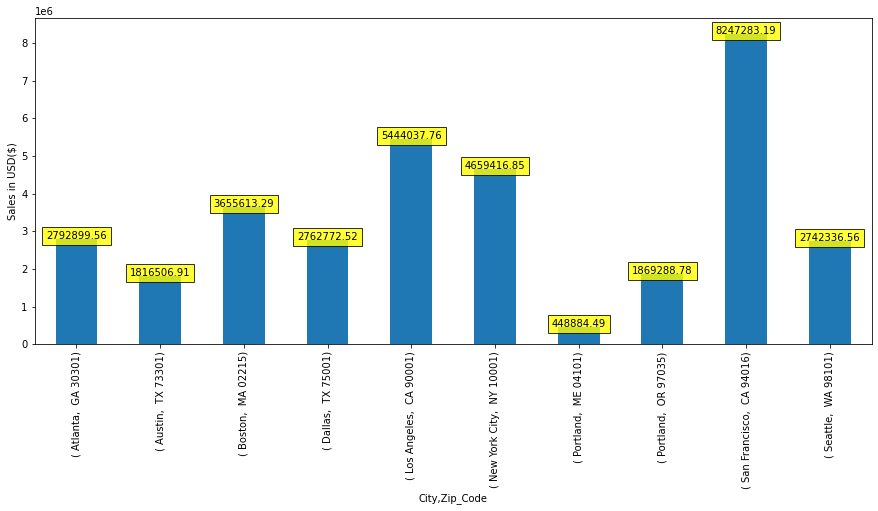

In [9]:
bar(city_grp)

In [10]:
%pip install pandas_bokeh

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install pgeocode

Note: you may need to restart the kernel to use updated packages.


In [12]:
#function to creat map plot
def map_plot(df:pd.DataFrame):
  import pandas_bokeh
  import pgeocode
  from shapely.geometry import Point
  pandas_bokeh.output_notebook()
  import plotly.express as px
  import plotly.graph_objects as go

  nomi = pgeocode.Nominatim('us')
  edf=df.reset_index()

  edf["zip-code"]=edf["Zip_Code"].str.split(expand=True)[1]
  edf['Latitude'] = (nomi.query_postal_code(edf['zip-code'].tolist()).latitude)
  edf['Longitude'] = (nomi.query_postal_code(edf['zip-code'].tolist()).longitude)

  scale = 5000

  fig = go.Figure(data=go.Scattergeo(
        lon = edf['Longitude'],
        lat = edf['Latitude'],
        mode = 'markers',
        marker = dict(
            size = edf["Total Price"]/scale,
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area',
            color="yellow",
        ),
        text=edf[["City","Total Price"]]
        ))

  fig.update_layout(
          title_text = 'Sales Distribution of 10 cities in USA',
          geo = dict(
              scope = 'usa',
              landcolor = 'rgb(217, 217, 217)',
          )
      )
  fig.show()


In [13]:
map_plot(city_grp)

Loading BokehJS ...

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

<p><code>Answer:</code>Just like I assumed San Fransco has the highest Sales</p>
<hr>

<p><code>Question3:</code>What time should we display advertisements to maximize likelihood of customer's buying products</p>

In [14]:
#change Order Date to datetime
df["Order Date"]=pd.to_datetime(df["Order Date"])

<p1><strong>Time of the day</strong></p>

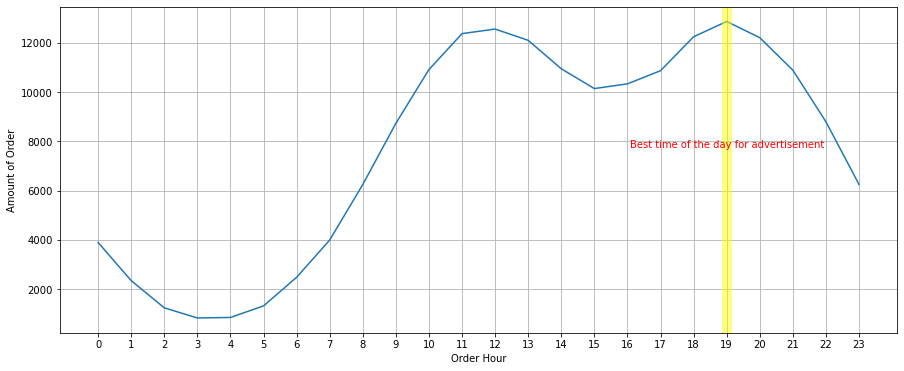

In [15]:
df["Order Hour"]=df["Order Date"].dt.hour
hour_grp=df.groupby("Order Hour")["Order ID"].count()

#plot
fig,ax=plt.subplots(figsize=(15,6))
hours=[hour for hour in hour_grp.index]
hour_grp.plot(ax=ax)
ax.set_xticks(hours)

#innotation
max_ind=hour_grp.idxmax()
ax.axvline(max_ind,color="yellow",linewidth=10,alpha=.5)
string = 'Best time of the day for advertisement'
label = ax.text(max_ind,hour_grp.max()-5000, string, ha='center', va='center', fontsize=10, color="Red")
plt.grid()
plt.ylabel("Amount of Order")
plt.show()

<p1><strong>day of a week</strong></p>

In [16]:
#function to plot two pie charts
def plot_pies(df1,df2):
  #plot pie chart
  #colors
  colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

  fig, axes = plt.subplots(1,2,figsize=(10,5))
  for ax,df in zip(axes.ravel(),[df1,df2]):
    ax.pie(df, colors = colors, labels=df.index,autopct="%1.1f",startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.5,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


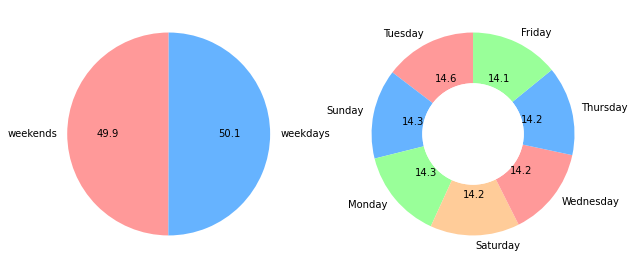

In [17]:
#first let's check do we have more orders on weekdays or on weekends
weekdays=["Monday","Thursday","Wednesday","Tuesday","Friday"]
weekends=["Saturday","Sunday"]

day_of_week_count=df["Order_day"].value_counts()
weekend_weekday_count=pd.Series({"weekends":int,"weekdays":int})
weekend_weekday_count["weekdays"]=day_of_week_count[weekdays].sum()/5
weekend_weekday_count["weekends"]=day_of_week_count[weekends].sum()/2


plot_pies(weekend_weekday_count,day_of_week_count)

<p>According to the pie chart we get nearly the same amount of customer per day whether weekend or weekdays </p>


<p><code>Answer:</code>the best time for advertisement is around 7pm </p>
<hr>

<p><code>Question 4:</code>What products are sold together?</p>
<code>Notion: products sold together have the same order ID<code>




In [18]:
ordered_together_df=df[df.duplicated(subset=("Order ID"),keep=False)].sort_values(by="Order ID")
ordered_together_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order_Month,Order_day,Address,City,Zip_Code,Product_cat,Quantity_cat,Total Price,Order Hour
23555,141275.0,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,January,Monday,610 Walnut St,Austin,TX 73301,cheap,normal,11.95,16
23556,141275.0,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,January,Monday,610 Walnut St,Austin,TX 73301,affordable,normal,11.99,16
23572,141290.0,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,January,Wednesday,4 1st St,Los Angeles,CA 90001,cheap,market,11.52,8
23571,141290.0,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,January,Wednesday,4 1st St,Los Angeles,CA 90001,expensive,normal,150.00,8
23648,141365.0,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,January,Thursday,20 Dogwood St,New York City,NY 10001,affordable,normal,11.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167088,319584.0,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,December,Wednesday,537 Sunset St,Portland,OR 97035,affordable,normal,11.99,0
167100,319596.0,iPhone,1.0,700.00,2019-12-01 08:44:00,December,Sunday,436 14th St,New York City,NY 10001,fancy,normal,700.00,8
167101,319596.0,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,December,Sunday,436 14th St,New York City,NY 10001,affordable,normal,14.95,8
167137,319631.0,Lightning Charging Cable,1.0,14.95,2019-12-17 22:35:00,December,Tuesday,363 Highland St,Austin,TX 73301,affordable,normal,14.95,22


In [19]:
ordered_together_df["Grouped"]=ordered_together_df.groupby("Order ID")["Product"].transform(lambda x:','.join(x))
ordered_together_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order_Month,Order_day,Address,City,Zip_Code,Product_cat,Quantity_cat,Total Price,Order Hour,Grouped
23555,141275.0,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,January,Monday,610 Walnut St,Austin,TX 73301,cheap,normal,11.95,16,"USB-C Charging Cable,Wired Headphones"
23556,141275.0,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,January,Monday,610 Walnut St,Austin,TX 73301,affordable,normal,11.99,16,"USB-C Charging Cable,Wired Headphones"
23572,141290.0,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,January,Wednesday,4 1st St,Los Angeles,CA 90001,cheap,market,11.52,8,"AA Batteries (4-pack),Apple Airpods Headphones"
23571,141290.0,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,January,Wednesday,4 1st St,Los Angeles,CA 90001,expensive,normal,150.00,8,"AA Batteries (4-pack),Apple Airpods Headphones"
23648,141365.0,Wired Headphones,1.0,11.99,2019-01-10 11:19:00,January,Thursday,20 Dogwood St,New York City,NY 10001,affordable,normal,11.99,11,"Wired Headphones,Vareebadd Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167088,319584.0,Wired Headphones,1.0,11.99,2019-12-11 00:30:00,December,Wednesday,537 Sunset St,Portland,OR 97035,affordable,normal,11.99,0,"iPhone,Wired Headphones"
167100,319596.0,iPhone,1.0,700.00,2019-12-01 08:44:00,December,Sunday,436 14th St,New York City,NY 10001,fancy,normal,700.00,8,"iPhone,Lightning Charging Cable"
167101,319596.0,Lightning Charging Cable,1.0,14.95,2019-12-01 08:44:00,December,Sunday,436 14th St,New York City,NY 10001,affordable,normal,14.95,8,"iPhone,Lightning Charging Cable"
167137,319631.0,Lightning Charging Cable,1.0,14.95,2019-12-17 22:35:00,December,Tuesday,363 Highland St,Austin,TX 73301,affordable,normal,14.95,22,"Lightning Charging Cable,34in Ultrawide Monitor"


In [20]:
count=Counter()
for row in ordered_together_df["Grouped"]:
  row_list=row.split(",")
  count.update(Counter(combinations(row_list,2)))

count.most_common(6)

[(('iPhone', 'Lightning Charging Cable'), 1582),
 (('Google Phone', 'USB-C Charging Cable'), 1557),
 (('Google Phone', 'Wired Headphones'), 699),
 (('iPhone', 'Wired Headphones'), 695),
 (('iPhone', 'Apple Airpods Headphones'), 591),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 591)]

In [21]:
def plot_tree_map(df):
  sizes =df
  labels=df.index
  fig, ax = plt.subplots(1, figsize = (12,12))
  colors= ["red", "black", "green",
          "violet", "yellow", "blue"]
  squarify.plot(sizes=sizes[:6], 
                label=labels[:6], 
                alpha=.8,pad=True,
                 color=colors)
  plt.axis('off')
  plt.show()

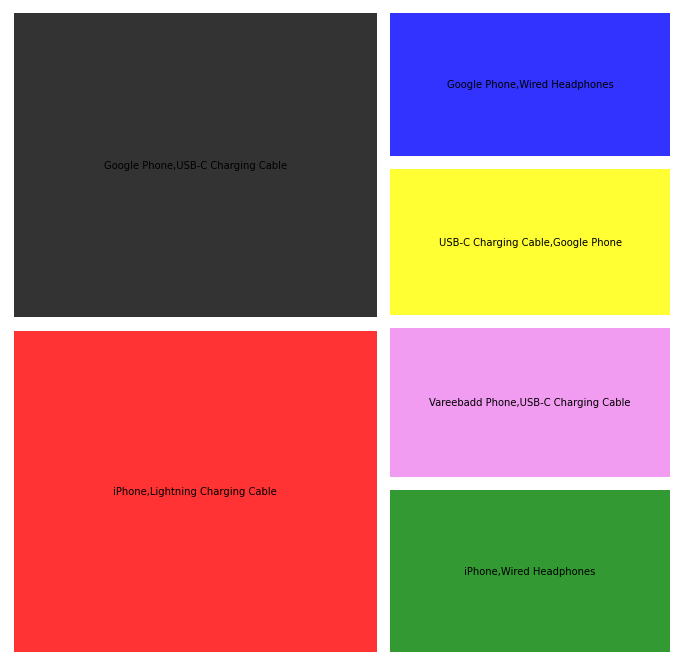

In [22]:
plot_tree_map(ordered_together_df["Grouped"].value_counts())

<p><code>Answer:</code>Iphone and Lightning Charging Cable are best sold together </p>
<hr>

<p><code>Question 5:</code>What products sold the most?and Why are they sold most</p>

In [23]:
product_quant_df=df.groupby("Product")["Quantity Ordered"].sum()
product_price_df=df.groupby("Product")["Price Each"].mean()

In [24]:
product_grp=pd.merge(product_quant_df,product_price_df,left_index=True,right_index=True)
product_grp

,Quantity Ordered,Price Each
Product,,
20in Monitor,4123.0,109.99
27in 4K Gaming Monitor,6234.0,389.99
27in FHD Monitor,7532.0,149.99
34in Ultrawide Monitor,6185.0,379.99
AA Batteries (4-pack),27595.0,3.84
AAA Batteries (4-pack),30955.0,2.99
Apple Airpods Headphones,15613.0,150.00
Bose SoundSport Headphones,13403.0,99.99
Flatscreen TV,4807.0,300.00


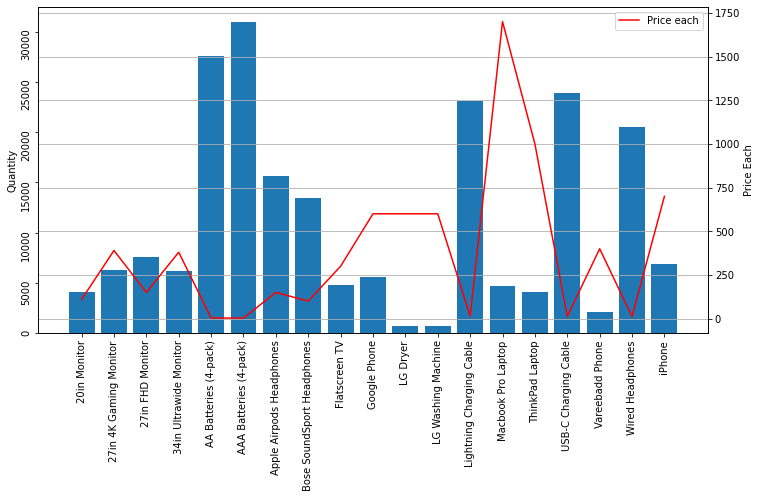

In [25]:
fig,ax=plt.subplots(figsize=(12,6))
ax1=ax.twinx()


# n=len(product_grp.index)
# r = np.arange(n)
# width = 0.35


ax.bar(product_grp.index,product_grp["Quantity Ordered"],label="Quantity")
ax1.plot(product_grp.index,product_grp["Price Each"],color="red",label="Price each")
ax.tick_params(labelrotation=90)

ax.set_ylabel("Quantity")
ax1.set_ylabel("Price Each")
plt.grid()
ax1.legend()
plt.show()

<p><code>Answer:</code>Batteries are the most sold and the reason behind must be their prices. They are really cheap </p>
<hr>

<h1><strong>Further Analysis</strong></h2>

<h2>Amount of orders and total sales through out time</h2>

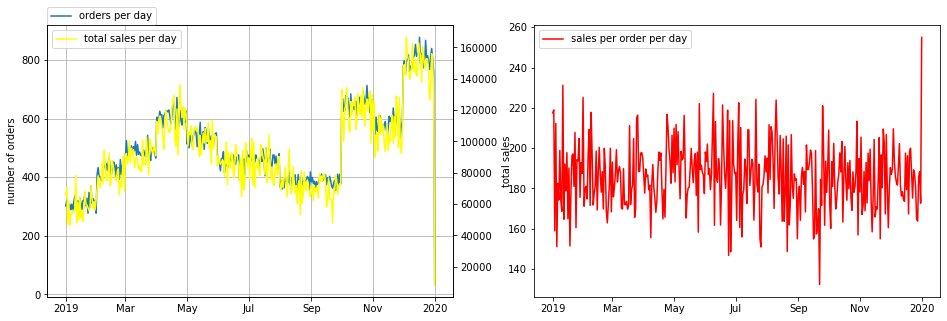

In [26]:
from matplotlib import dates as mdates
fig,[ax1,ax3]=plt.subplots(1,2,figsize=(16,5))
ax2=ax1.twinx()
ax1.plot(df["Order Date"].dt.date.value_counts().sort_index(),label="orders per day")
ax2.plot(df.groupby(by=df["Order Date"].dt.date)["Total Price"].sum(),color="yellow",label="total sales per day")
ax1.grid(True)
ax1.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax3.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


ax3.plot(df.groupby(by=df["Order Date"].dt.date)["Total Price"].sum()/df["Order Date"].dt.date.value_counts().sort_index(),color="red",label="sales per order per day")

ax1.legend(loc=(0,1))
ax2.legend()
ax3.legend()
ax1.set_ylabel("number of orders")
ax2.set_ylabel("total sales")
plt.show()

<h2>The lower the price, more tendency to buy</h2>

<AxesSubplot:xlabel='Total Price', ylabel='Quantity Ordered'>

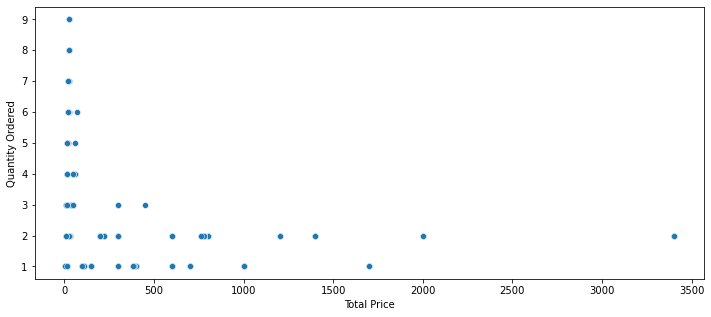

In [27]:
fig=plt.subplots(figsize=(12,5))
sns.scatterplot(data=df,x="Total Price",y="Quantity Ordered")

<AxesSubplot:xlabel='Product_cat', ylabel='Count'>

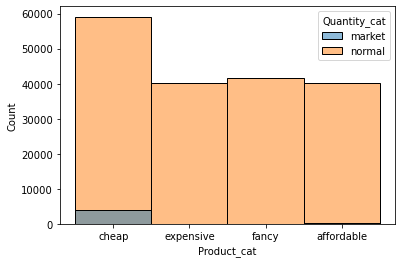

In [28]:
sns.histplot(data=df,x="Product_cat",hue="Quantity_cat")

<ul>
  <li>Here market means products which are bought more than 2</li>
  <li>product are catagorized into four groups [cheap,expensive, fancy and affordable]
</ul>
<p><code>Note</code>Notice that onely cheap and affordable products are bought in market quantity</p>